In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
%matplotlib inline

In [6]:
# Read the 'Advertising.csv' dataset

data_filename = 'Advertising.csv'

# Read data file using pandas libraries

df = pd.read_csv(data_filename)
df

,TV,Radio,Newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [24]:
# Step 1: Assign predictor and response variable

# Assign TV advertising as predictor variable 'x' and sales as response variable 'y'

x = df[['TV']]
y = df[['sales']]

In [27]:
# Step 2: divide the data into training and validation sets

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)


In [29]:
# Use the sklearn function 'LinearRegression' to fit on the training set

model = LinearRegression()

model.fit(x_train, y_train)

# Now predict on the test set

y_pred_test = model.predict(x_test)

In [30]:
# Now compute the MSE with the predicted values and print it

mse = mean_squared_error(y_test, y_pred_test)
print(f'The test MSE is {mse}')

The test MSE is 11.619363476724764


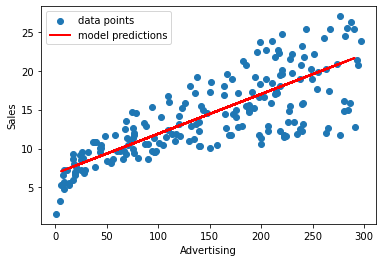

In [34]:
fig, ax = plt.subplots()
ax.scatter(x,y,label='data points')
ax.plot(x_test.values, y_pred_test, color='red', linewidth=2, label='model predictions')
ax.set_xlabel('Advertising')
ax.set_ylabel('Sales')
ax.legend()

# Challenge: Repeat using Radio to predict sales

# Extra challenge: Repeat using both TV and Radio to predict sales

Which model is the best?

## Hi my name is

In [40]:
x_options=[['TV'],['Radio'],['Newspaper'],['TV','Radio'],['TV','Newspaper'],['Radio','Newspaper'],['TV','Radio','Newspaper']]
y=df['sales']

for x_label in x_options:
    x=df[x_label]
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)
    model = LinearRegression()

    model.fit(x_train, y_train)

    # Now predict on the test set

    y_pred_test = model.predict(x_test)
    mse=mean_squared_error(y_test, y_pred_test)
    coefs=model.coef_
    print(x_label,"mse: ", mse,"coef:",coefs)

['TV'] mse:  9.900429880875167 coef: [0.04527218]
['Radio'] mse:  17.088393733050314 coef: [0.2092425]
['Newspaper'] mse:  25.02742892085607 coef: [0.06097761]
['TV', 'Radio'] mse:  1.859308321167535 coef: [0.04624375 0.18737823]
['TV', 'Newspaper'] mse:  7.757569819541911 coef: [0.04720264 0.05121747]
['Radio', 'Newspaper'] mse:  18.201093213395573 coef: [0.17792679 0.01678537]
['TV', 'Radio', 'Newspaper'] mse:  2.7969813313438667 coef: [ 0.04772478  0.19432428 -0.00213232]


In [38]:
model.coef_

array([[0.05101894]])